# AI_MED2023 experiment #

In [85]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA
from sklearn import svm
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Iris Data Import ##

<img src="iris_flower.png" width="400">
<img src="iris_feature.png" width="400">
<img src="iris_measure.png" width="400">

Load data

In [87]:
from sklearn import datasets
#importing the Iris dataset with sklearn
iris = datasets.load_iris()
X=iris.data
y=iris.target #(0:setosa, 1:versicolor, 2:virginica)
target_names = iris.target_names #(setosa, versicolor,virginica)
feature_names=iris.feature_names

In [88]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('C:/Users/yumin/Downloads/AIMED/Iris.csv')
X = dataset.iloc[:, [0, 1, 2, 3]].values
y = dataset.iloc[:,4].values
feature_names = dataset.columns[[0, 1, 2, 3]]
print(f"feature_names={feature_names}")
target_names = np.unique(y)
print(f"target_names={target_names}")

feature_names=Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
target_names=['setosa' 'versicolor' 'virginica']


Check data

In [89]:
print(f"Type of X={type(X)}")
print(f"Type of feature_names={type(feature_names)}")
print(f"Type of target_names={type(target_names)}")
# print data size
print(X.shape, y.shape)
# print the label species
print(target_names)
# print the names of the features
print(feature_names)
# print the  data (top 5 records)
print(X[0:5])
# print the  labels 
print(y)
print(type(X))

Type of X=<class 'numpy.ndarray'>
Type of feature_names=<class 'pandas.core.indexes.base.Index'>
Type of target_names=<class 'numpy.ndarray'>
(150, 4) (150,)
['setosa' 'versicolor' 'virginica']
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicol

# Dimension reduction using PCA #

In [90]:
# 모델 구성
pca = PCA(n_components=2) # from four to two dimension

# 데이터로 모델 추정
pca.fit(X)

print(f"Explained variance={pca.explained_variance_ratio_}")


Explained variance=[0.92461621 0.05301557]


In [91]:
print(f"Lambda={pca.singular_values_}")
# principal components, weights for each variable
print(f"Components={pca.components_}")

Lambda=[25.08986398  6.00785254]
Components=[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [92]:
# 데이터에 적용
X_r2 = pca.transform(X)
print('PCA DIM:',X.shape,'->',X_r2.shape)
print(f"PCA components={X_r2[0:10,:]}")

PCA DIM: (150, 4) -> (150, 2)
PCA components=[[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]]


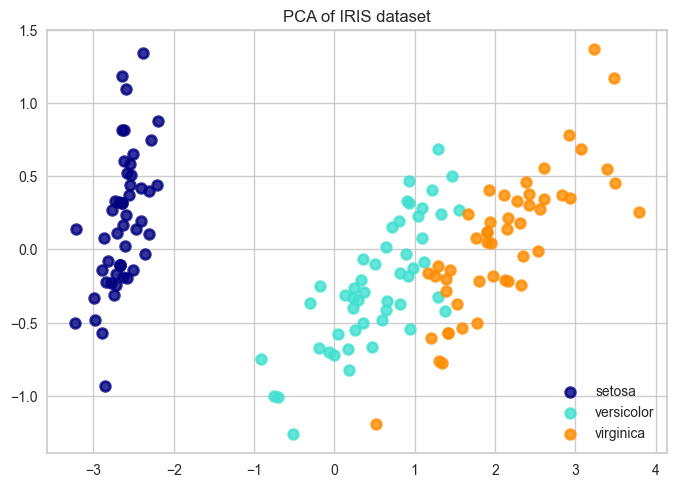

In [93]:
# Display PCA in 2D
X_r=X_r2
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, yclass, target_name in zip(colors, ['setosa', 'versicolor', 'virginica'], target_names):
    plt.scatter(X_r[y == yclass, 0], X_r[y == yclass, 1], color=color, alpha=.8, lw=lw,label=target_name)
    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

PCA (150, 4) -> (150, 3)


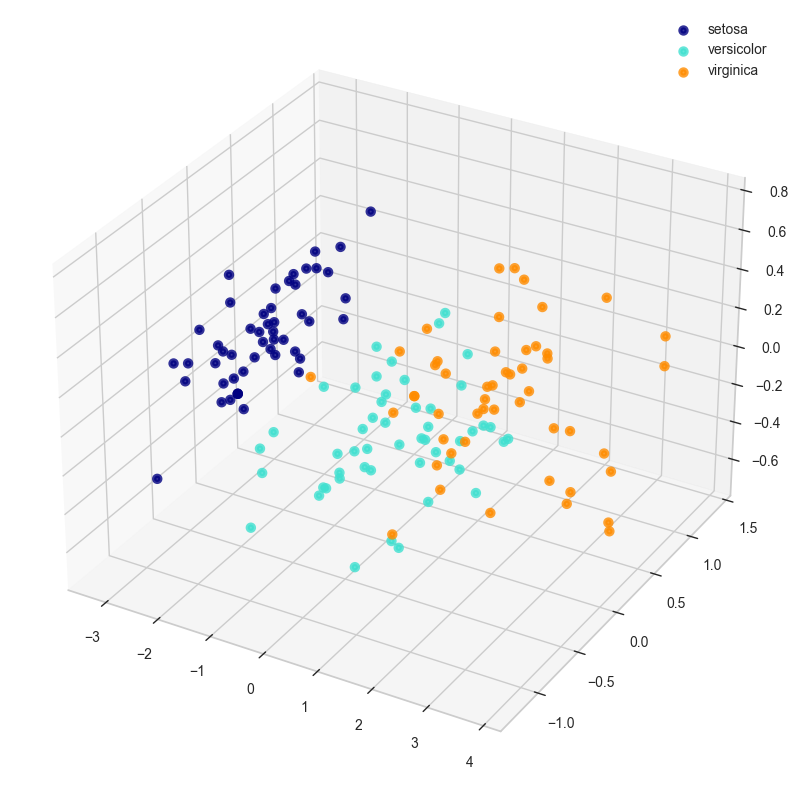

<Figure size 800x550 with 0 Axes>

In [94]:
# Display PCA in 3D
pca = PCA(n_components=3)
X_r3 = pca.fit(X).transform(X)
print('PCA',X.shape,'->',X_r3.shape)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

X_r=X_r3
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 3
for color, yclass, target_name in zip(colors, target_names, target_names):
    ax.scatter3D(X_r[y == yclass, 0], X_r[y == yclass, 1], X_r[y == yclass, 2], color=color, alpha=.8, lw=lw,label=target_name)
    
ax.legend()
plt.show()    

## Sparse PCA

In [95]:
from numpy.random import default_rng

In [96]:
rng = default_rng()
rvals = rng.standard_normal([X.shape[0],10])

In [97]:
Xtest=np.concatenate([X,rvals],1)
print(f"By concatenation raw data with noise, X dim={X.shape} -> Xtest dim={Xtest.shape}");

By concatenation raw data with noise, X dim=(150, 4) -> Xtest dim=(150, 14)


In [98]:
# 모델 구성
spca = SparsePCA(n_components=3,random_state=0) # from four to two dimension
# 데이터로 모델 추정
spca.fit(Xtest)

SparsePCA(n_components=3, random_state=0)

In [99]:
# principal components, weights for each variable
spca.components_

array([[ 0.34432769, -0.04426059,  0.8734304 ,  0.3411433 ,  0.01483354,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        ,  0.64237379, -0.        ,
        -0.76639149, -0.        , -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.        , -0.        ,
        -0.        , -0.        , -0.        , -0.        , -0.38128898,
        -0.        , -0.28720259, -0.8524698 ,  0.2131399 ]])

In [100]:
#apply old or new data to the trained pca model
Xs=spca.transform(Xtest)

In [101]:
# 비교 : PCA 모델 구성
pca1 = PCA(n_components=3,random_state=0) # from four to two dimension
# 데이터로 모델 추정
pca1.fit(Xtest)
Xp=pca1.transform(Xtest)

In [102]:
print(f"Xp={Xp[0:5,:5]}")
print(f"Xs={Xs[0:5,:]}")

Xp=[[-2.78652163 -0.77147669 -0.01046786]
 [-2.90405326 -1.71534899  0.88333281]
 [-2.90990961  0.68550751  0.6070904 ]
 [-3.03700731 -0.14936491  0.07132137]
 [-2.62210804 -0.23750853 -1.29355493]]
Xs=[[-2.65458291 -0.3575444  -0.33659729]
 [-2.71530667 -0.42349094  0.93516498]
 [-2.87267753  1.32484321  0.36754584]
 [-2.73734012 -0.63134047  0.67237945]
 [-2.67533001  0.44393025 -1.74610773]]


In [103]:
print(f"Cp={pca1.components_[:,:6]}")
print(f"Cs={spca.components_[:,:6]}")

Cp=[[ 0.35848495 -0.08060634  0.84985161  0.35591467  0.06617058 -0.00667648]
 [-0.03003841  0.04402753 -0.04992815 -0.01532838  0.16886954 -0.17557355]
 [ 0.03460841  0.00517911  0.02246059  0.00226846 -0.00856094  0.24739878]]
Cs=[[ 0.34432769 -0.04426059  0.8734304   0.3411433   0.01483354  0.        ]
 [-0.         -0.         -0.         -0.         -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.         -0.        ]]


# K-means Clustering

In [104]:
print(X.shape)

(150, 4)


In [105]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = "auto", random_state = 0)
y_kmeans = kmeans.fit_predict(X)

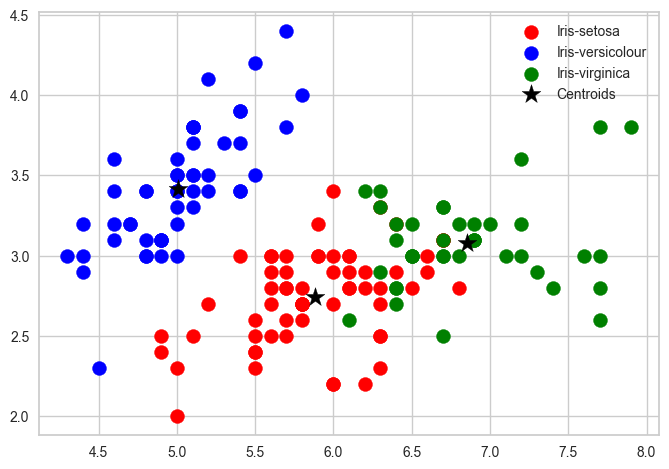

In [106]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 200, c = 'black', marker='*',label = 'Centroids')
plt.legend()

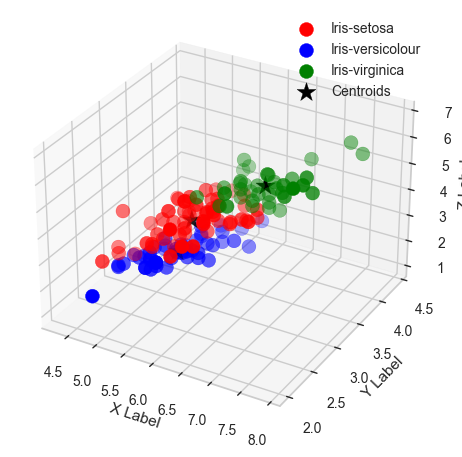

In [107]:
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], X[y_kmeans == 0, 2],s = 100, c = 'red', label = 'Iris-setosa')
ax.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], X[y_kmeans == 1, 2],s = 100, c = 'blue', label = 'Iris-versicolour')
ax.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], X[y_kmeans == 2, 2],s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s = 200, c = 'black', marker='*',label = 'Centroids')
plt.legend()

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

## Check Data Group using K-Means Clustering #

### 1. Elbow Method

Select the scoring metric to evaluate the clusters. The default is the mean distortion, defined by the sum of squared distances between each observation and its closest centroid. Other metrics include:

1. distortion: mean sum of squared distances to centers
2. silhouette: mean ratio of intra-cluster and nearest-cluster distance
3. calinski_harabasz: ratio of within to between cluster dispersion

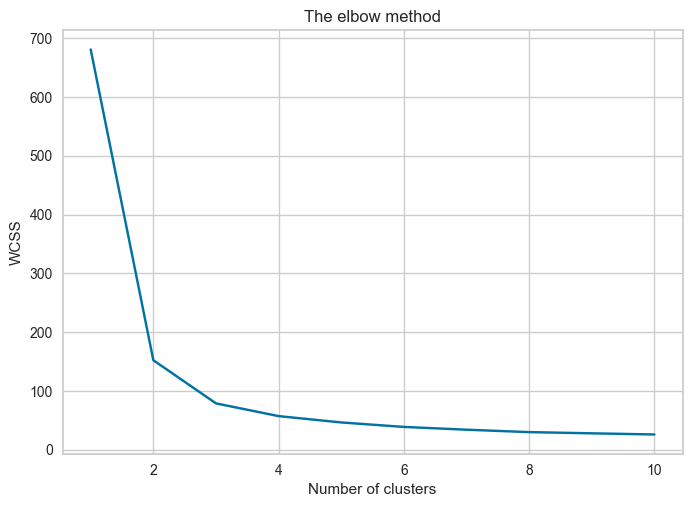

In [108]:
wcss=[]
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [109]:
!pip install yellowbrick

C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

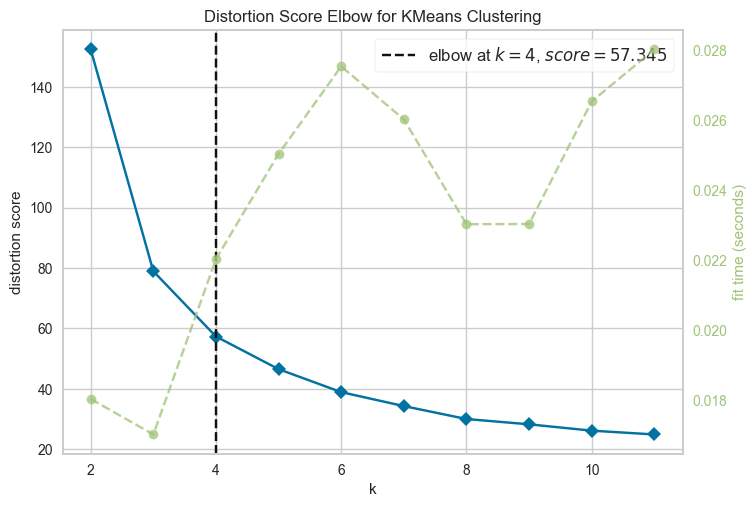

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [110]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12)) #default metric: distortion

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

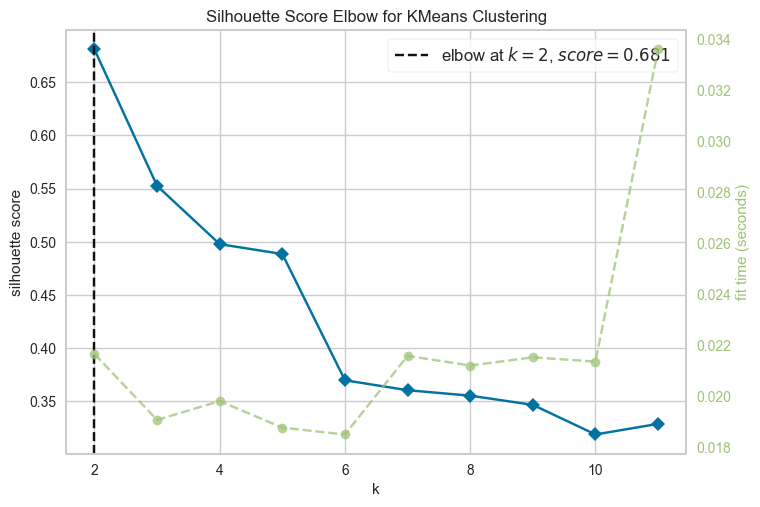

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [111]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12),metric='silhouette')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

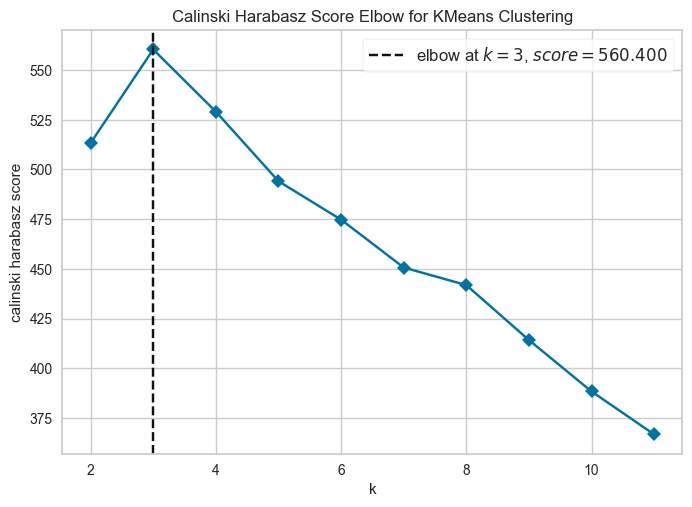

<Axes: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [112]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### 실루엣 분석(Silhouette Analysis) : Clustering 적절성 분석

In [113]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

### 좋은 군집화 조건
1. 전체 실루엣 계수의 평균값, 즉 사이킷런의 shihoutte_score()값은 0~1사이의 값을 가지며, 1에 가까울수록 좋다.
2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다. 
즉, 개별 군집의 실루엣 계수 평균값이 전체 실루엣 계수의 평균값에서 크게 벗어나지 않는 것이 중요하다.
만약 전체 실루엣 계수의 평균값은 높지만, 특정 군집의 실루엣 계수 평균값만 유난히 높고 다른 군집들의 실루엣 계수 평균값은 낮으면 좋은 군집화 조건이 아니다.

C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


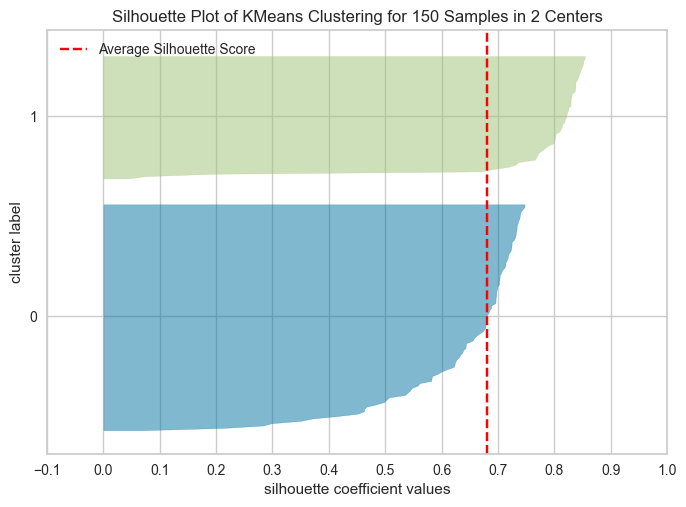

C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


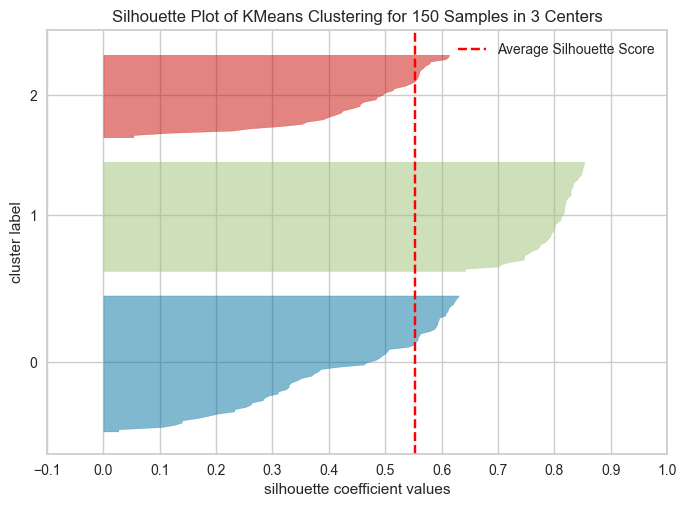

C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


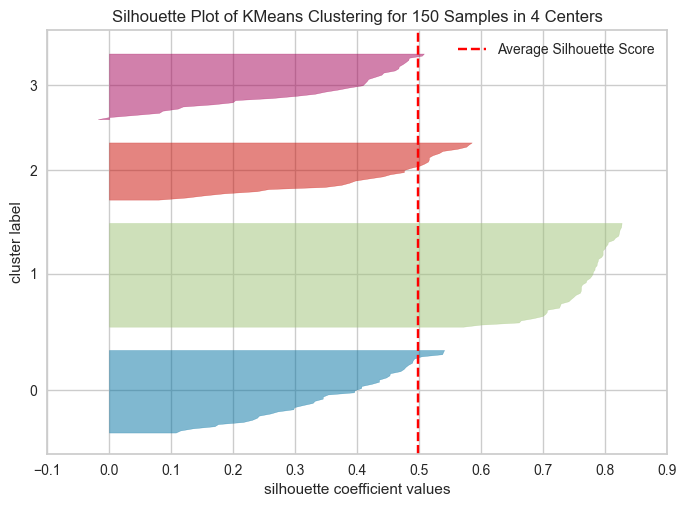

In [114]:
for k in range(2,5):
    model = KMeans(k, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(X)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

In [115]:
from sklearn.metrics import silhouette_samples, silhouette_score

for n_clusters in range(2,5):
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )


C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

For n_clusters = 2 The average silhouette_score is : 0.6808136202936816
For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472


### Intercluster Distance Maps

C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


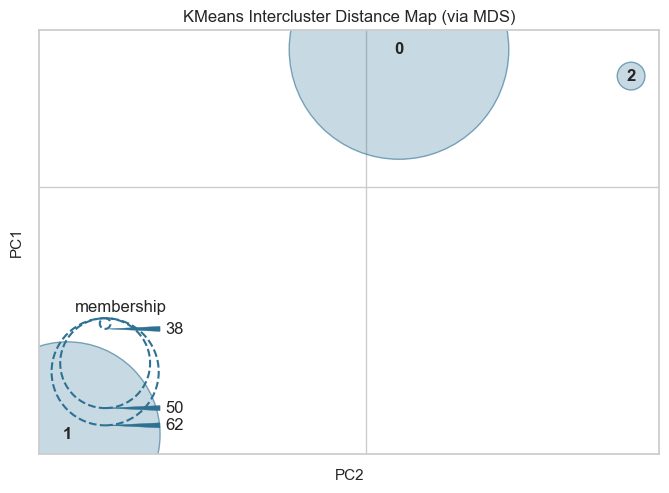

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [116]:
from yellowbrick.cluster import InterclusterDistance
# Instantiate the clustering model and visualizer

model = KMeans(3, random_state=42)
visualizer = InterclusterDistance(model)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# Support Vector Machine #

We can now quickly sample a training set while holding out 40% of the data for testing (evaluating) our classifier:

$Φ(w) = ½ |w|^2 + C Σξ_i $ is minimized and for all {(xi ,yi)}

In [117]:
X = dataset.iloc[:, [0, 1, 2, 3]].values
y = dataset.iloc[:,4].to_numpy()

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [119]:
# check train and test data set
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


## Core steps of SVM

Core steps of SVM

In [120]:
# 모델 생성
model = svm.SVC(kernel='linear',C=1) #kernel='rbf'
# 데이터 이용 모델 파라미터 추정
model.fit(X_train, y_train)  
y_pred=model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print('Accuracy:',model.score(X_test,y_test),'with C=1') # accuracy

0.9736842105263158
Accuracy: 0.9736842105263158 with C=1


In [121]:
X_train.shape

(112, 4)

In [122]:
#predict a new data set
model = svm.SVC(kernel='linear',C=1) #kernel='rbf'
model.fit(X_train, y_train)  
species_idx = model.predict([[3, 5, 4, 2]])[0]
print('You entered',species_idx)

You entered virginica


Full steps of SVM

In [123]:
for kernel in ['linear','rbf']:
    print('Kernel=',kernel)
    for c in [0.01,0.1,1,10,100,1000]:
        model = svm.SVC(kernel=kernel,C=c) #kernel='rbf'
        model.fit(X_train, y_train)  
        acc=model.score(X_test,y_test)
        print('   Accuracy:{:4.3f} with C={}'.format(acc,c)) # accuracy

Kernel= linear
   Accuracy:0.842 with C=0.01
   Accuracy:0.974 with C=0.1
   Accuracy:0.974 with C=1
   Accuracy:0.974 with C=10
   Accuracy:0.947 with C=100
   Accuracy:0.974 with C=1000
Kernel= rbf
   Accuracy:0.237 with C=0.01
   Accuracy:0.789 with C=0.1
   Accuracy:0.974 with C=1
   Accuracy:0.974 with C=10
   Accuracy:0.974 with C=100
   Accuracy:0.947 with C=1000


## Confusion matrix

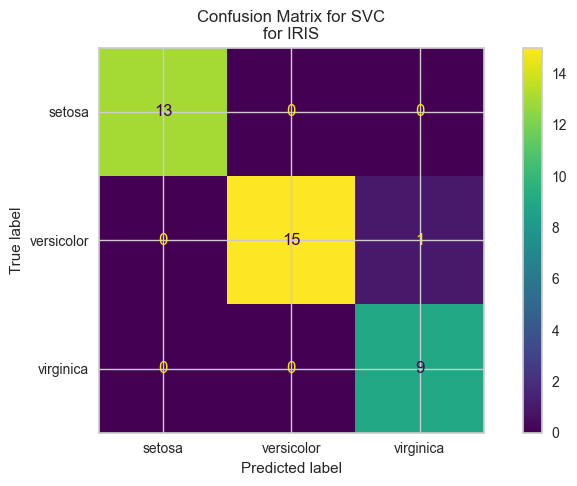

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay

model = svm.SVC(C=1) #kernel='rbf'
model.fit(X_train,y_train)

y_pred=model.predict(X_test)    
fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {model.__class__.__name__}\nfor IRIS"
)

## Computing 5-fold cross-validation ##

In [125]:
model=svm.SVC(kernel='linear',C=1)
scores = cross_val_score(model, X, y, cv=5)

In [126]:
scores.mean()

0.9800000000000001

In [127]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.03)


In [128]:
for kernel in ['linear','rbf']:
    print('Kernel=',kernel)
    for c in [0.01,0.1,1,10,100,1000]:
        model = svm.SVC(kernel=kernel,C=c) #kernel='rbf'
        scores = cross_val_score(model, X, y, cv=5)
        print("Accuracy C=%d: %0.2f (+/- %0.2f)" % (c, scores.mean(), scores.std() * 2))

Kernel= linear
Accuracy C=0: 0.92 (+/- 0.08)
Accuracy C=0: 0.97 (+/- 0.03)
Accuracy C=1: 0.98 (+/- 0.03)
Accuracy C=10: 0.97 (+/- 0.08)
Accuracy C=100: 0.97 (+/- 0.08)
Accuracy C=1000: 0.97 (+/- 0.08)
Kernel= rbf
Accuracy C=0: 0.93 (+/- 0.05)
Accuracy C=0: 0.92 (+/- 0.05)
Accuracy C=1: 0.97 (+/- 0.04)
Accuracy C=10: 0.98 (+/- 0.03)
Accuracy C=100: 0.97 (+/- 0.08)
Accuracy C=1000: 0.96 (+/- 0.08)


## Receiver Operating Characteristic (ROC) analysis

In [129]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('C:/Users/yumin/Downloads/AIMED/Iris.csv')
X = dataset.iloc[:, [0, 1, 2, 3]].values
y = dataset.iloc[:,4].values
feature_names = dataset.columns[[0, 1, 2, 3]]
print(f"feature_names={feature_names}")
target_names = np.unique(y)
print(f"target_names={target_names}")

feature_names=Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
target_names=['setosa' 'versicolor' 'virginica']


In [130]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

In [131]:
y1 = label_binarize(y, classes=target_names)
n_classes = y1.shape[1]
print(y1)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

### Multiclass training ###

In [132]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

# shuffle and split training and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.5, random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="linear", probability=True,random_state=random_state)
)
y_score = classifier.fit(X1_train, y1_train).decision_function(X1_test)

In [133]:
print(y_score)

[[-3.58459897 -0.3117717   1.78242707]
 [-2.15411929  1.11394949 -2.393737  ]
 [ 1.89199335 -3.89592195 -6.29685764]
 [-4.52609987 -0.63396965  1.96065819]
 [ 1.39684192 -1.77722963 -6.26300472]
 [-4.29544529 -1.45402775  3.29458805]
 [ 1.60323992 -2.10413788 -6.37623283]
 [-2.65028866 -1.23852652 -0.51739315]
 [-2.86540149 -0.51681963 -0.7183625 ]
 [-1.98461469 -0.42888096 -1.70646586]
 [-3.74016002  0.4967413   0.82186705]
 [-2.38375773 -1.40490207 -0.60548048]
 [-2.64026621 -0.18334473 -0.76615536]
 [-2.6974942  -0.48066323 -0.71100338]
 [-2.68086321 -0.48076708 -0.42256446]
 [ 1.29117385 -1.00014571 -6.5048863 ]
 [-2.52210662 -0.53054572 -0.52952971]
 [-2.41636546  0.45111054 -0.99069072]
 [ 1.25101273 -0.81683438 -6.36116848]
 [ 1.74739869 -3.24428645 -6.25493848]
 [-3.18923262 -0.16043215  1.00089508]
 [-2.45158845 -0.59283772 -0.24998163]
 [ 1.00481639 -1.56906253 -5.5277339 ]
 [ 1.26350425 -0.37917207 -6.32976484]
 [-3.02357691 -0.38553503  0.20999377]
 [ 2.02104714 -2.22647378

### Compute ROC curve and ROC area for each class ###

In [134]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y1_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y1_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

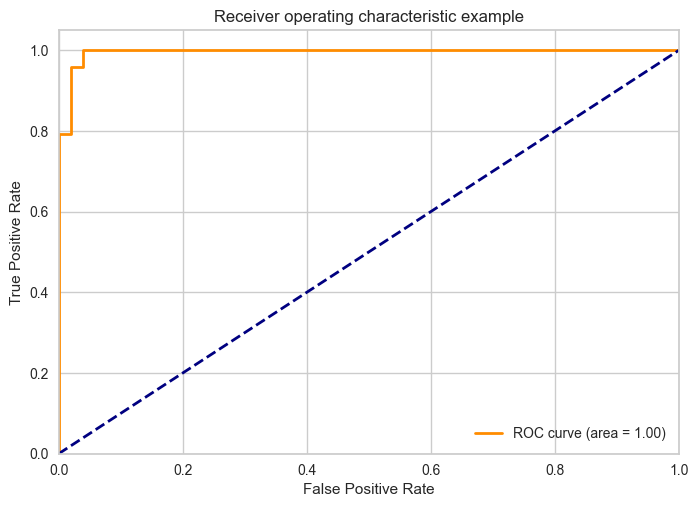

In [135]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

## Plot ROC curves for the multiclass problem
Plot ROC curves for the multiclass problem
Compute macro-average ROC curve and ROC area

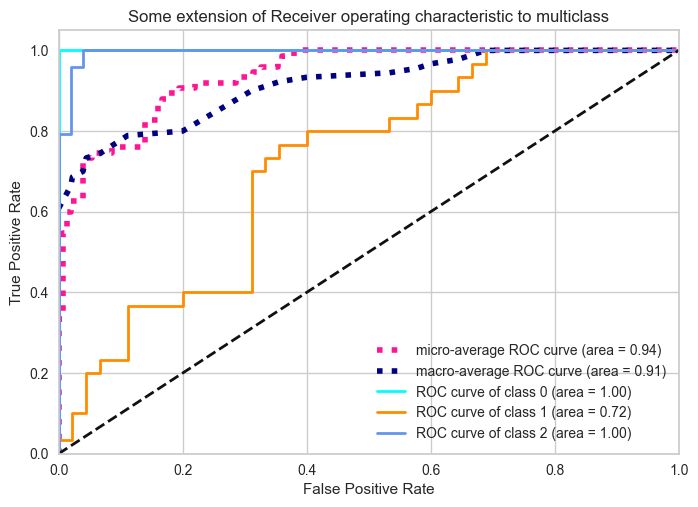

In [136]:
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

## Important Features ##

In [137]:
def f_importances0(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
    
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::][0:top], align='center')
    plt.yticks(range(top), names[::][0:top])
    plt.show()

Two groups

In [138]:
X1 = dataset.iloc[:100, [0, 1, 2, 3]].values
y1 = dataset.iloc[:100,4].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [139]:
model = svm.SVC(kernel='linear',C=1)
model.fit(X1_train, y1_train)
acc=model.score(X1_test,y1_test)
print('   Accuracy:{:4.3f} with C={}'.format(acc,c)) # accuracy

   Accuracy:1.000 with C=1000


In [140]:
model.coef_

array([[ 0.04621618, -0.52128466,  1.00306716,  0.46413911]])

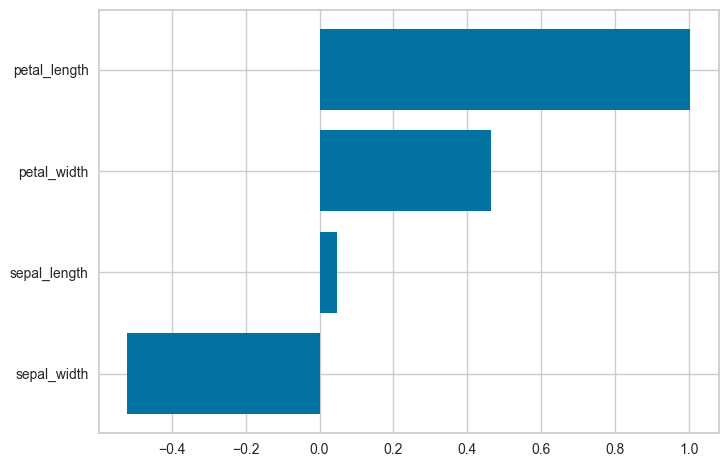

In [141]:
f_importances(model.coef_[0], feature_names)

If you're using rbf (Radial basis function) kernal, you can use

In [142]:
from sklearn.inspection import permutation_importance
#The permutation feature importance is defined to be the decrease in a model score 
# when a single feature value is randomly shuffled

Text(0.5, 0, 'Permutation Importance')

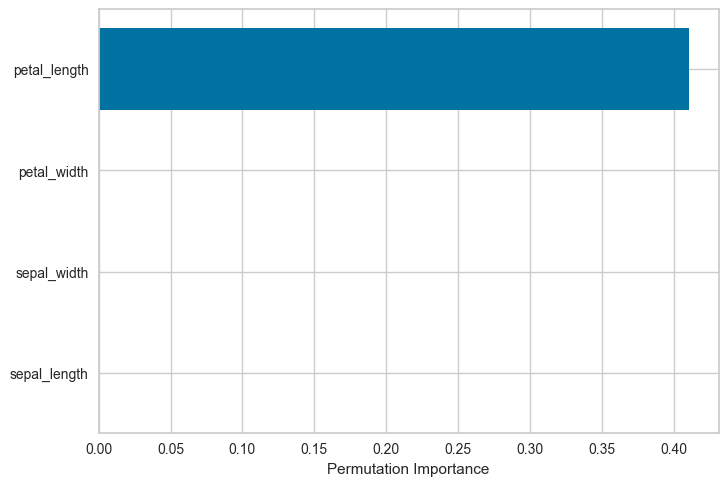

In [143]:
model = svm.SVC(kernel='rbf',C=1)
model.fit(X1_train, y1_train)
acc=model.score(X1_test,y1_test)
perm_importance = permutation_importance(model, X_test, y_test)
features = np.array(feature_names)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Three groups

In [144]:
model = svm.SVC(kernel='linear',C=1)
model.fit(X_train, y_train)
acc=model.score(X_test,y_test)
print('   Accuracy:{:4.3f} with C={}'.format(acc,c)) # accuracy

   Accuracy:0.974 with C=1000


In [145]:
model.coef_

array([[-0.04627259,  0.52114901, -1.00303714, -0.46412669],
       [ 0.04016065,  0.16064259, -0.56224908, -0.24096389],
       [ 0.84531147,  0.72837956, -2.09462768, -1.83669367]])

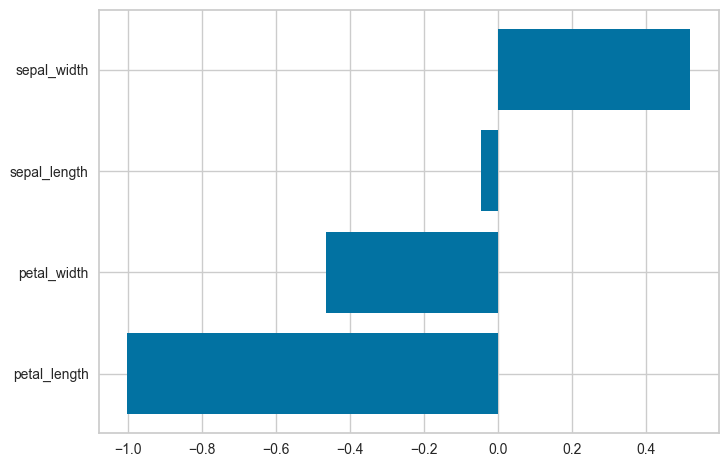

In [146]:
f_importances(model.coef_[0], feature_names)

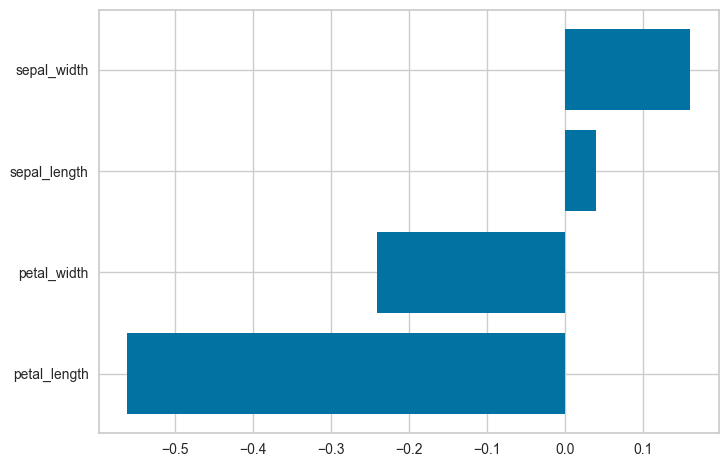

In [147]:
f_importances(model.coef_[1], feature_names)

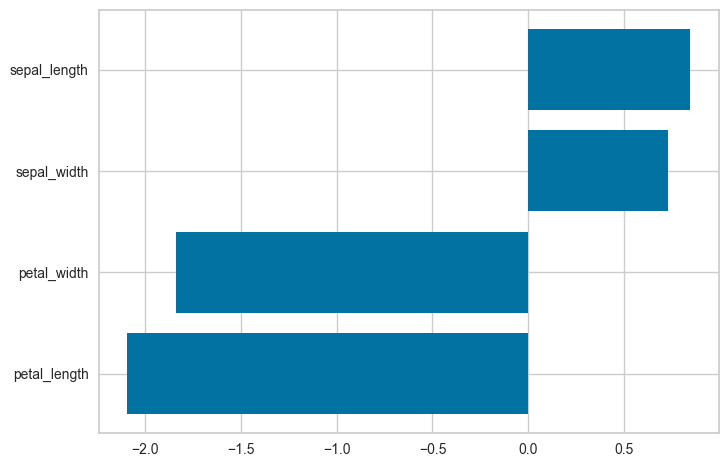

In [148]:
f_importances(model.coef_[2], feature_names)

## Data transformation by normalization

In [149]:
scaler = preprocessing.StandardScaler().fit(X_train) 
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [150]:
scaler.mean_

array([5.88660714, 3.05178571, 3.79642857, 1.22232143])

In [151]:
model = svm.SVC(kernel='linear',C=1.0,gamma='auto') #kernel='linear'
model.fit(X_train_transformed, y_train)  
y_pred=model.predict(X_test_transformed)
model.score(X_test_transformed,y_test) # accuracy

0.9736842105263158

# Random Forest #

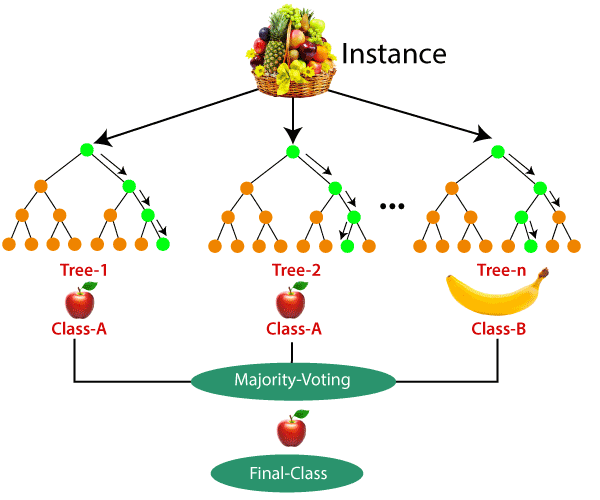

In [152]:
#importing the Iris dataset with pandas
dataset = pd.read_csv('C:/Users/yumin/Downloads/AIMED/Iris.csv')
X = dataset.iloc[:, [0, 1, 2, 3]].values
y = dataset.iloc[:,4].values
feature_names = dataset.columns[[0, 1, 2, 3]]
print(f"feature_names={feature_names}")
target_names = np.unique(y)
print(f"target_names={target_names}")

feature_names=Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
target_names=['setosa' 'versicolor' 'virginica']


In [153]:
# Creating a DataFrame of given iris dataset in a simple way
data=pd.DataFrame({
    'sepal_length':X[:,0],
    'sepal_width':X[:,1],
    'petal_length':X[:,2],
    'petal_width':X[:,3],
    'species':y
})
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [154]:
# Create a DataFrame from X and feature_names dynamically
data = pd.DataFrame({feature_name: X[:, i] for i, feature_name in enumerate(feature_names)})
data['species'] = y

# Display the resulting DataFrame
print(data.head())



   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [155]:
# Import train_test_split function
X=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y=data['species']  # Labels

In [156]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [157]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(y_pred)
model.score(X_test,y_test)

['versicolor' 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'virginica' 'setosa' 'virginica' 'versicolor' 'versicolor'
 'setosa' 'virginica' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica'
 'virginica' 'versicolor']


0.9777777777777777

### Confusion matrix

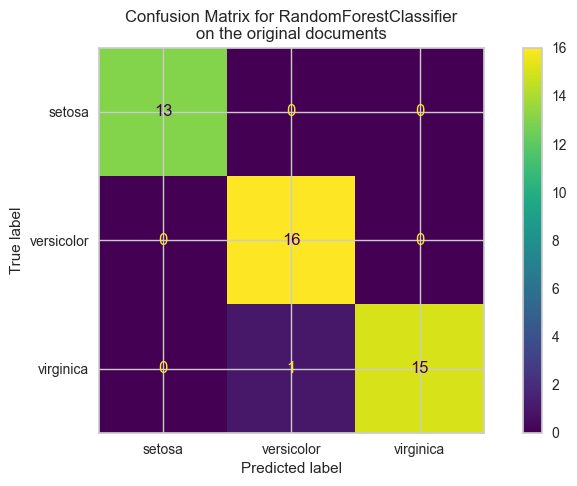

In [158]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {model.__class__.__name__}\non the original documents"
)

In [159]:
#new sample data
species_idx = model.predict([[3, 5, 4, 2]])[0]
print(species_idx)

virginica


C:\Users\yumin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Finding Important Features

In [160]:
feature_imp = pd.Series(model.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.445700
petal length (cm)    0.423365
sepal length (cm)    0.106136
sepal width (cm)     0.024799
dtype: float64

In [161]:
!pip install seaborn

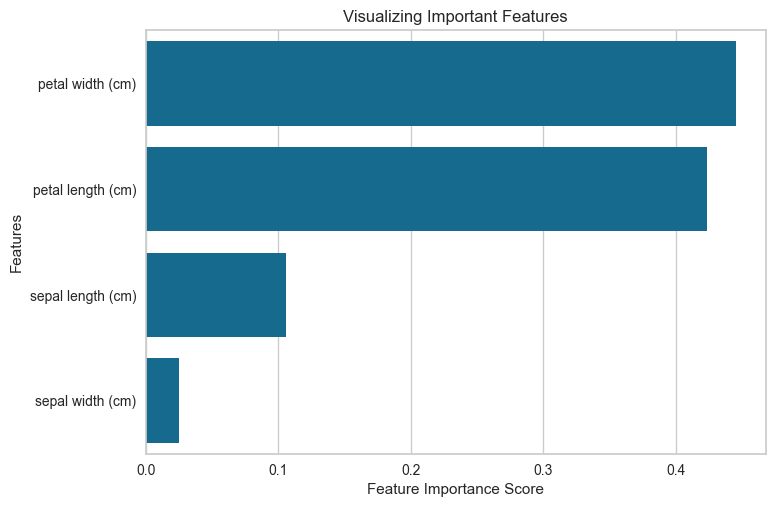

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Generating the Model on Selected Features
We can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.

In [163]:
# Split dataset into features and labels
X=data[['petal_length', 'petal_width','sepal_length']]  # Removed feature "sepal length"
y=data['species']                                       
print(X)

     petal_length  petal_width  sepal_length
0             1.4          0.2           5.1
1             1.4          0.2           4.9
2             1.3          0.2           4.7
3             1.5          0.2           4.6
4             1.4          0.2           5.0
..            ...          ...           ...
145           5.2          2.3           6.7
146           5.0          1.9           6.3
147           5.2          2.0           6.5
148           5.4          2.3           6.2
149           5.1          1.8           5.9

[150 rows x 3 columns]


In [164]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [165]:
#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

# prediction on test set
y_pred=model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


In [166]:
#Create a Gaussian Classifier
model=RandomForestClassifier(n_estimators=100,criterion='entropy')

#Train the model using the training sets y_pred=clf.predict(X_test)
model.fit(X_train,y_train)

# prediction on test set
y_pred=model.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


## 기타
### Feature selection:
https://scikit-learn.org/stable/modules/classes.html?highlight=feature%20selection#module-sklearn.feature_selection